# _Second Assessment of Average Median Household Income (AMI) + Exploration of Other Demographics within Los Angeles County_ - Jala Ashan Abner

#### Within the preliminary assessment, I examained the Average Median Income dataset provided by the County of Los Angeles to observe trends correlated between census tracts and income. In this round of analysis, I will merge in supplementary census data to identify and map out correlative relationships found between race, ethnicity, educational attainment, and income. 
#### At the surface, our project aims to identify trends found between income and commute times; through more in-depth analysis, we will also assess health and environmental outcomes that correspond with income levels and commute times. Methods used to analyze trends within the data include but are not limited to:
1. summary statistics
2. data visualizations - bar graphs, scatterplots, histograms
3. mapping

## import python libraries for analysis

In [4]:
import pandas as pd
import geopandas as gpd

## import demographics data

In [5]:
pwd

'/home/jovyan/GIS-group/Group Assignments'

In [6]:
cd ../

/home/jovyan/GIS-group


In [7]:
demo_data = pd.read_csv("/home/jovyan/GIS-group/data/raw/census_demodata.csv")
demo_data

,GEO_ID,NAME,P9_001N,P9_002N,P9_003N,P9_004N,P9_005N,P9_006N,P9_007N,P9_008N,...,P9_065N,P9_066N,P9_067N,P9_068N,P9_069N,P9_070N,P9_071N,P9_072N,P9_073N,Unnamed: 75
0,Geography,Geographic Area Name,!!Total:,!!Total:!!Hispanic or Latino,!!Total:!!Not Hispanic or Latino:,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,NaN
1,0500000US06037,"Los Angeles County, California",10014009,4804763,5209246,4896193,2563609,760689,18453,1474237,...,257,125,111,9,6,6,0,31,31,NaN
2,1400000US06037101110,Census Tract 1011.10; Los Angeles County; Cali...,4926,1381,3545,3368,2840,65,7,434,...,0,0,0,0,0,0,0,0,0,NaN
3,1400000US06037101122,Census Tract 1011.22; Los Angeles County; Cali...,3728,542,3186,3067,2614,31,7,392,...,0,0,0,0,0,0,0,0,0,NaN
4,1400000US06037101220,Census Tract 1012.20; Los Angeles County; Cali...,3344,1081,2263,2162,1751,34,4,352,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1400000US06037980038,Census Tract 9800.38; Los Angeles County; Cali...,4,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2496,1400000US06037980039,Census Tract 9800.39; Los Angeles County; Cali...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2497,1400000US06037990100,Census Tract 9901; Los Angeles County; California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2498,1400000US06037990200,Census Tract 9902; Los Angeles County; California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


## assess the structure & data types of the dataset

In [8]:
demo_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEO_ID       2500 non-null   object 
 1   NAME         2500 non-null   object 
 2   P9_001N      2500 non-null   object 
 3   P9_002N      2500 non-null   object 
 4   P9_003N      2500 non-null   object 
 5   P9_004N      2500 non-null   object 
 6   P9_005N      2500 non-null   object 
 7   P9_006N      2500 non-null   object 
 8   P9_007N      2500 non-null   object 
 9   P9_008N      2500 non-null   object 
 10  P9_009N      2500 non-null   object 
 11  P9_010N      2500 non-null   object 
 12  P9_011N      2500 non-null   object 
 13  P9_012N      2500 non-null   object 
 14  P9_013N      2500 non-null   object 
 15  P9_014N      2500 non-null   object 
 16  P9_015N      2500 non-null   object 
 17  P9_016N      2500 non-null   object 
 18  P9_017N      2500 non-null   object 
 19  P9_018

## generate a new variable for the simplified census tract using str.split

In [9]:
demo_data[['ignore','tract']] = demo_data['GEO_ID'].str.split('S', expand=True)
demo_data

,GEO_ID,NAME,P9_001N,P9_002N,P9_003N,P9_004N,P9_005N,P9_006N,P9_007N,P9_008N,...,P9_067N,P9_068N,P9_069N,P9_070N,P9_071N,P9_072N,P9_073N,Unnamed: 75,ignore,tract
0,Geography,Geographic Area Name,!!Total:,!!Total:!!Hispanic or Latino,!!Total:!!Not Hispanic or Latino:,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,!!Total:!!Not Hispanic or Latino:!!Population...,NaN,Geography,None
1,0500000US06037,"Los Angeles County, California",10014009,4804763,5209246,4896193,2563609,760689,18453,1474237,...,111,9,6,6,0,31,31,NaN,0500000U,06037
2,1400000US06037101110,Census Tract 1011.10; Los Angeles County; Cali...,4926,1381,3545,3368,2840,65,7,434,...,0,0,0,0,0,0,0,NaN,1400000U,06037101110
3,1400000US06037101122,Census Tract 1011.22; Los Angeles County; Cali...,3728,542,3186,3067,2614,31,7,392,...,0,0,0,0,0,0,0,NaN,1400000U,06037101122
4,1400000US06037101220,Census Tract 1012.20; Los Angeles County; Cali...,3344,1081,2263,2162,1751,34,4,352,...,0,0,0,0,0,0,0,NaN,1400000U,06037101220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1400000US06037980038,Census Tract 9800.38; Los Angeles County; Cali...,4,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,1400000U,06037980038
2496,1400000US06037980039,Census Tract 9800.39; Los Angeles County; Cali...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,1400000U,06037980039
2497,1400000US06037990100,Census Tract 9901; Los Angeles County; California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,1400000U,06037990100
2498,1400000US06037990200,Census Tract 9902; Los Angeles County; California,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,1400000U,06037990200


## only keep the 'important' columns/variables from census dataset

In [10]:
columns_kept = ['tract',
                'P9_001N',
                'P9_002N',
                'P9_003N',
                'P9_004N',
                'P9_005N',
                'P9_006N',
                'P9_007N',
                'P9_008N']
columns_kept

['tract',
 'P9_001N',
 'P9_002N',
 'P9_003N',
 'P9_004N',
 'P9_005N',
 'P9_006N',
 'P9_007N',
 'P9_008N']

## get rid of the first row; it contains the variable labels, which we will re-establish later

In [11]:
demo_select = demo_data[columns_kept][1:]
demo_select 

,tract,P9_001N,P9_002N,P9_003N,P9_004N,P9_005N,P9_006N,P9_007N,P9_008N
1,06037,10014009,4804763,5209246,4896193,2563609,760689,18453,1474237
2,06037101110,4926,1381,3545,3368,2840,65,7,434
3,06037101122,3728,542,3186,3067,2614,31,7,392
4,06037101220,3344,1081,2263,2162,1751,34,4,352
5,06037101221,3444,1178,2266,2175,1840,73,3,246
...,...,...,...,...,...,...,...,...,...
2495,06037980038,4,2,2,0,0,0,0,0
2496,06037980039,0,0,0,0,0,0,0,0
2497,06037990100,0,0,0,0,0,0,0,0
2498,06037990200,0,0,0,0,0,0,0,0


## rename the columns we kept

In [12]:
columns = list(demo_select)
columns

['tract',
 'P9_001N',
 'P9_002N',
 'P9_003N',
 'P9_004N',
 'P9_005N',
 'P9_006N',
 'P9_007N',
 'P9_008N']

In [13]:
demo_select.columns = ['tract',
                       'Total Population',
                       'Total Hispanic/Latine Population',
                       'Total Non-Hispanic/Latine Population',
                       'Total Non-Hispanic/Latine Population, One Race',
                       'Total White, Non-Hispanic/Latine',
                       'Total Black, Non-Hispanic/Latine',
                       'Total American Indian/American Native, Non-Hispanic/Latine',
                       'Total Asian, Non-Hispanic/Latine']

## change the character type of the population counts; this enables us to conduct descriptive statistics

In [14]:
demo_select = demo_select.astype({'Total Population':'float',
                                  'Total Hispanic/Latine Population':'float',
                                  'Total Non-Hispanic/Latine Population': 'float',
                                 'Total Non-Hispanic/Latine Population, One Race': 'float',
                                 'Total White, Non-Hispanic/Latine': 'float',
                                 'Total Black, Non-Hispanic/Latine': 'float',
                                 'Total American Indian/American Native, Non-Hispanic/Latine': 'float',
                                 'Total Asian, Non-Hispanic/Latine': 'float'})

In [15]:
demo_select.head()

,tract,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
1,06037,10014009.0,4804763.0,5209246.0,4896193.0,2563609.0,760689.0,18453.0,1474237.0
2,06037101110,4926.0,1381.0,3545.0,3368.0,2840.0,65.0,7.0,434.0
3,06037101122,3728.0,542.0,3186.0,3067.0,2614.0,31.0,7.0,392.0
4,06037101220,3344.0,1081.0,2263.0,2162.0,1751.0,34.0,4.0,352.0
5,06037101221,3444.0,1178.0,2266.0,2175.0,1840.0,73.0,3.0,246.0


In [16]:
demo_select['Total Population'].mean()

8014.412965186075

In [17]:
demo_select['Total Population'].describe()

count    2.499000e+03
mean     8.014413e+03
std      2.002451e+05
min      0.000000e+00
25%      3.036500e+03
50%      3.906000e+03
75%      4.887500e+03
max      1.001401e+07
Name: Total Population, dtype: float64

## prepare to import LA Average Median Income Data; check working directory

In [18]:
pwd

'/home/jovyan/GIS-group'

In [19]:
cd "/home/jovyan/GIS-group/data"

/home/jovyan/GIS-group/data


## read shapefile into notebook

In [20]:
tracts = gpd.read_file('raw/MedianIncome.geojson')
tracts

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,geometry
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,2347,1.041050e+07,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0..."
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2348,3.724107e+06,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0..."
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2349,3.296129e+06,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0..."
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,2350,4.782361e+06,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0..."
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,2351,1.099246e+07,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,06037554516,126450.0,1215,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4837,1.555650e+07,21274.227408,"POLYGON ((-118.07225 33.85452, -118.07047 33.8..."
2491,06037554517,107672.0,1352,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4838,1.421767e+07,15905.089174,"POLYGON ((-118.06374 33.86586, -118.05352 33.8..."
2492,06037554518,104439.0,1558,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4839,1.938903e+07,21218.412991,"POLYGON ((-118.04646 33.87326, -118.03776 33.8..."
2493,06037554519,131012.0,1216,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,4840,1.866694e+07,19500.866806,"POLYGON ((-118.06362 33.85858, -118.05495 33.8..."


## merge with census demographic dataset 

In [21]:
ct_IncRace=tracts.merge(demo_select,on="tract")
ct_IncRace

,tract,med_hh_income,med_hh_income_universe,ami_category,below_med_income,below_60pct_med_income,below_moderate_income,sup_dist,csa,spa,...,Shape__Length,geometry,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,06037199700,38892.0,1204,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,...,13808.463241,"POLYGON ((-118.22672 34.06242, -118.22453 34.0...",3393.0,2193.0,1200.0,1132.0,519.0,95.0,7.0,479.0
1,06037199801,41027.0,903,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,...,9459.391827,"POLYGON ((-118.21559 34.07186, -118.21169 34.0...",3036.0,1946.0,1090.0,1066.0,92.0,38.0,2.0,929.0
2,06037199802,42500.0,612,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,...,8868.744225,"POLYGON ((-118.21563 34.07365, -118.21309 34.0...",2144.0,1172.0,972.0,931.0,53.0,7.0,8.0,859.0
3,06037199900,37232.0,845,Very Low Income,Yes,Yes,Yes,District 1,Los Angeles - Lincoln Heights,SPA 4 - Metro,...,10141.728022,"POLYGON ((-118.21528 34.06349, -118.21547 34.0...",2641.0,2025.0,616.0,597.0,76.0,57.0,0.0,447.0
4,06037201110,65000.0,782,Low Income,Yes,No,Yes,District 1,Los Angeles - El Sereno,SPA 4 - Metro,...,15893.383636,"POLYGON ((-118.18182 34.09277, -118.18039 34.0...",2332.0,1737.0,595.0,568.0,258.0,54.0,2.0,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2490,06037554516,126450.0,1215,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,...,21274.227408,"POLYGON ((-118.07225 33.85452, -118.07047 33.8...",3821.0,536.0,3285.0,3168.0,460.0,190.0,12.0,2478.0
2491,06037554517,107672.0,1352,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,...,15905.089174,"POLYGON ((-118.06374 33.86586, -118.05352 33.8...",4737.0,608.0,4129.0,3965.0,505.0,231.0,12.0,3192.0
2492,06037554518,104439.0,1558,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,...,21218.412991,"POLYGON ((-118.04646 33.87326, -118.03776 33.8...",5365.0,611.0,4754.0,4581.0,646.0,299.0,8.0,3609.0
2493,06037554519,131012.0,1216,Above Moderate Income,No,No,No,District 4,City of Cerritos,SPA 7 - East,...,19500.866806,"POLYGON ((-118.06362 33.85858, -118.05495 33.8...",3489.0,348.0,3141.0,3021.0,451.0,130.0,2.0,2413.0


## assess the dimensions of the dataset

In [22]:
ct_IncRace.shape

(2495, 22)

## assess the structure of the dataset

In [23]:
ct_IncRace.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 22 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   tract                                                       2495 non-null   object  
 1   med_hh_income                                               2458 non-null   float64 
 2   med_hh_income_universe                                      2495 non-null   int64   
 3   ami_category                                                2458 non-null   object  
 4   below_med_income                                            2458 non-null   object  
 5   below_60pct_med_income                                      2458 non-null   object  
 6   below_moderate_income                                       2458 non-null   object  
 7   sup_dist                                                    2495 non-n

## check to see if there are any missing values within the dataset

In [24]:
ct_IncRace.columns[ct_IncRace.isna().all()].tolist()

[]

## preliminary summary statistics on the Average Median Income variable

In [25]:
ct_IncRace['med_hh_income'].describe()

count      2458.000000
mean      76849.334418
std       35546.132788
min        4918.000000
25%       51157.500000
50%       69698.000000
75%       94515.500000
max      250001.000000
Name: med_hh_income, dtype: float64

## visualize the distribution of AMI across census tracts via a histogram

<Axes: ylabel='Frequency'>

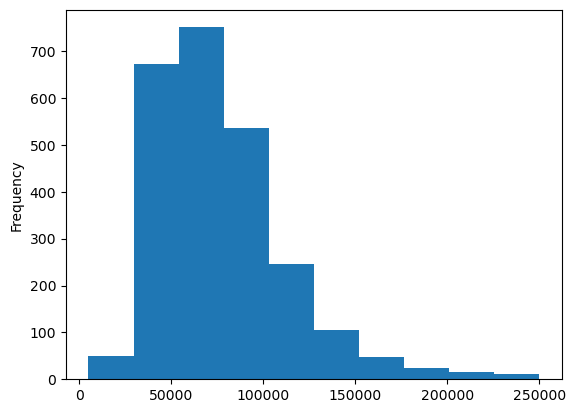

In [26]:
ct_IncRace['med_hh_income'].plot.hist(bins = 10)

## visualize the distribution of AMI based on supervisory district

<Axes: xlabel='sup_dist', ylabel='med_hh_income'>

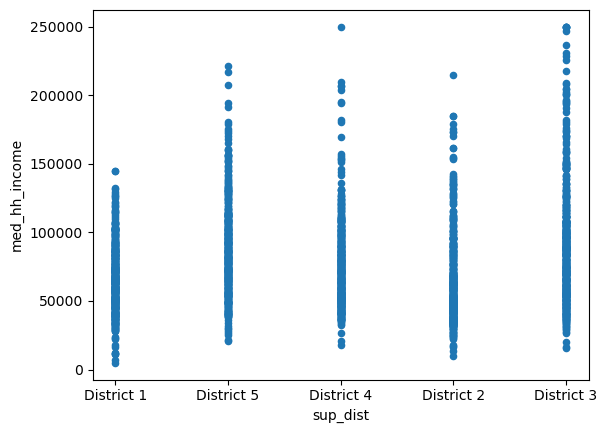

In [27]:
tracts.plot.scatter(x='sup_dist',y='med_hh_income')

## sort AMI from highest to lowest; identify the ten tracts with the lowest AMI

In [28]:
tracts_highest = ct_IncRace.sort_values(by='med_hh_income', ascending = False)

In [29]:
tracts_highest[['tract','med_hh_income']].head(10)

,tract,med_hh_income
1303,06037262100,250001.0
1308,06037262400,250001.0
1930,06037141700,250001.0
1307,06037262303,250001.0
2090,06037980019,250001.0
1196,06037670500,250000.0
1309,06037262501,246750.0
1384,06037800206,236709.0
1305,06037262301,231188.0
2375,06037194300,228836.0


## sort AMI from lowest to highest; identify the ten tracts with the lowest AMI

In [30]:
tracts_lowest = ct_IncRace.sort_values(by='med_hh_income')

In [31]:
tracts_lowest[['tract','med_hh_income']].head(10)

,tract,med_hh_income
138,06037206303,4918.0
137,06037206302,7193.0
771,06037224702,9722.0
136,06037206301,11153.0
143,06037207304,11430.0
146,06037207307,12283.0
135,06037206202,12344.0
624,06037221820,13630.0
1461,06037265306,15417.0
766,06037224320,16471.0


## produce a horizontal bar chart of the ten lowest AMI tracts in Los Angeles County

<Axes: title={'center': 'Los Angeles County Census Tracts with the Lowest Average Median Income 2020'}, ylabel='tract'>

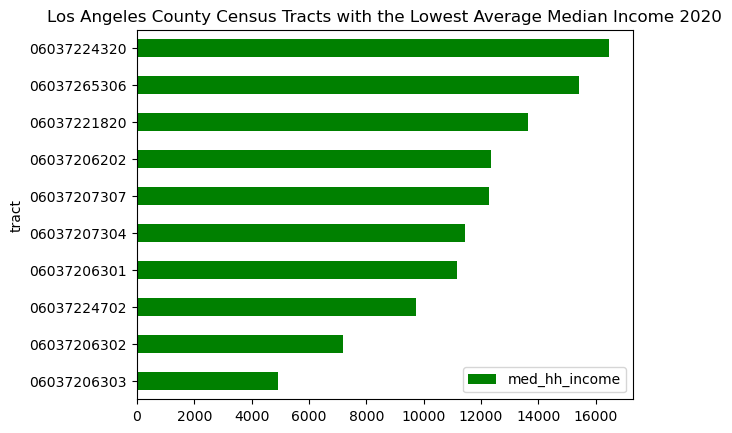

In [32]:
tracts_lowest.head(10).plot.barh(x='tract',
                                y='med_hh_income',
                                title = 'Los Angeles County Census Tracts with the Lowest Average Median Income 2020',
                                color = 'green')

## produce a horizontal bar chart of the ten highest AMI tracts in Los Angeles County

<Axes: title={'center': 'Los Angeles County Census Tracts with the Highest Average Median Income 2020'}, ylabel='tract'>

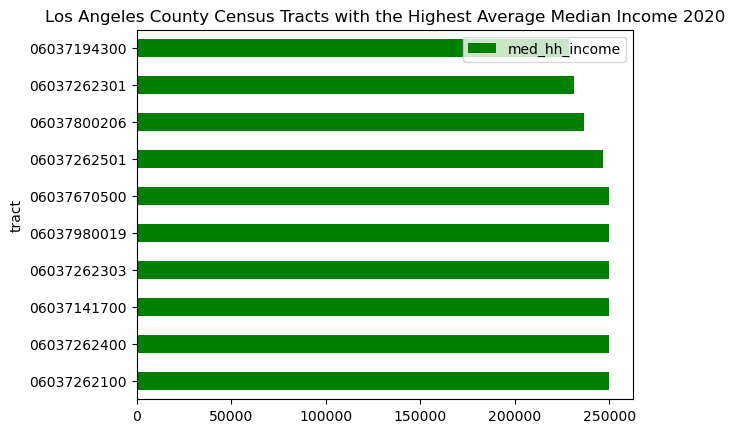

In [33]:
tracts_highest.head(10).plot.barh(x='tract',
                                y='med_hh_income',
                                title = 'Los Angeles County Census Tracts with the Highest Average Median Income 2020',
                                color = 'green')

## plot a map of Los Angeles County

<Axes: >

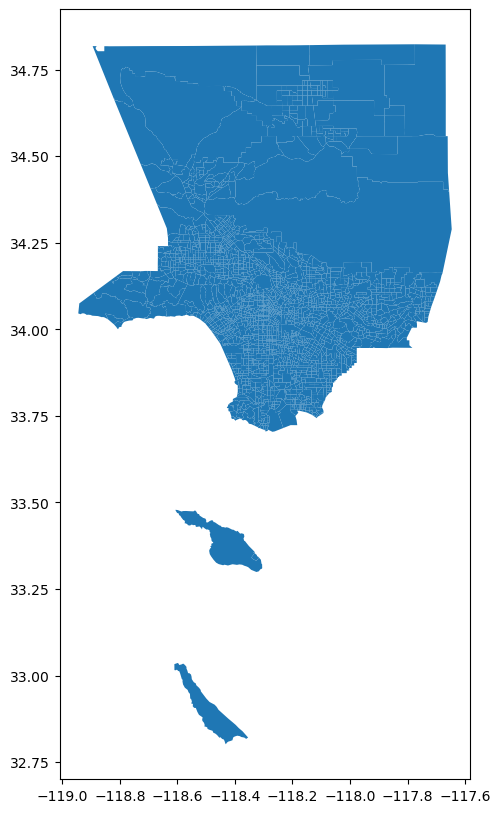

In [34]:
ct_IncRace.plot(figsize=(12,10))

## plot a map of AMI across census tracts within Los Angeles County, using Natural Breaks

<Axes: >

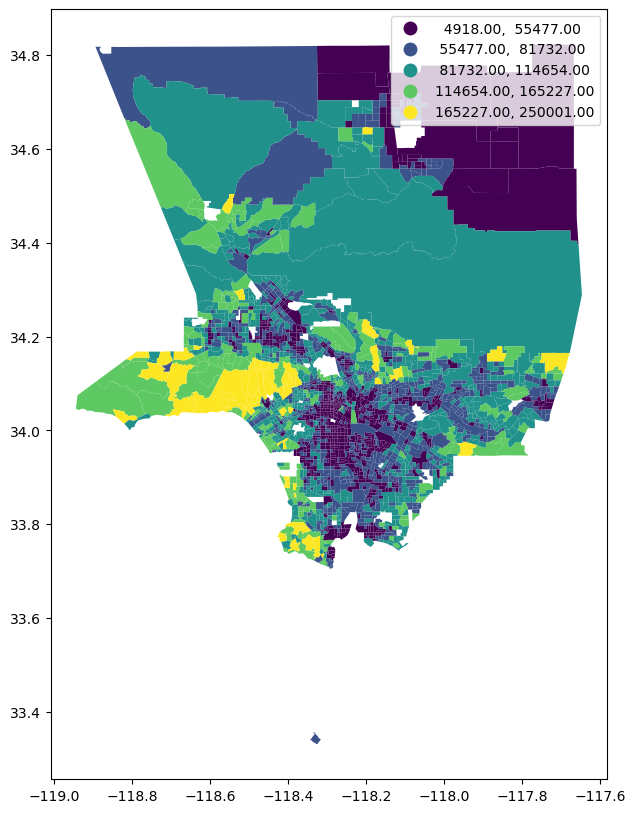

In [35]:
ct_IncRace.plot(figsize=(12,10),
                 column='med_hh_income',
                 legend=True, 
                 scheme='NaturalBreaks')

## Assess the geographical changes in distribution of census tract with income variation

<Axes: >

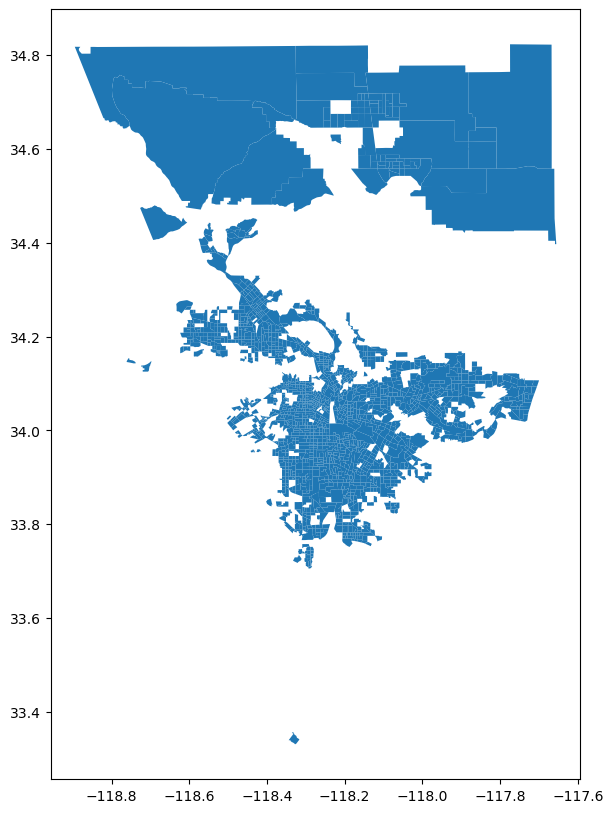

In [36]:
ct_IncRace[ct_IncRace.below_moderate_income == 'Yes'].plot(figsize=(12,10))

<Axes: >

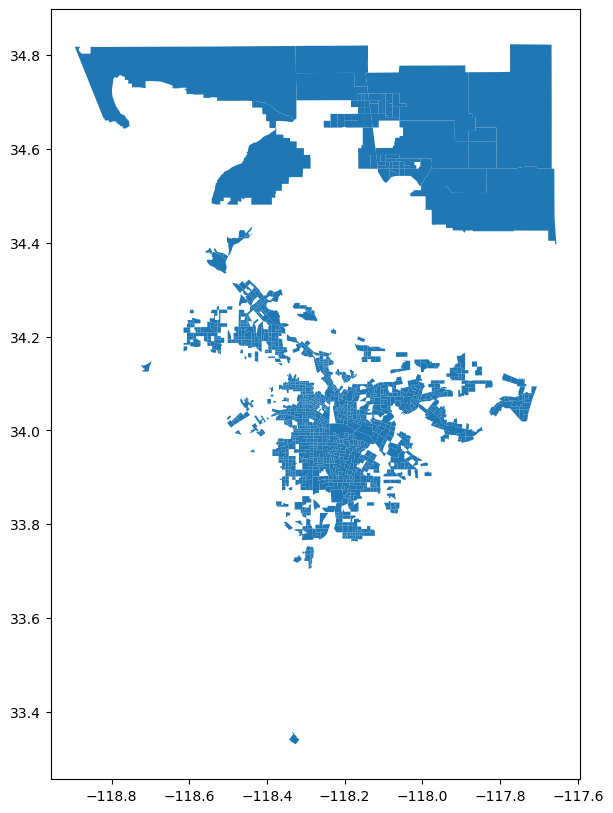

In [37]:
ct_IncRace[ct_IncRace.below_med_income == 'Yes'].plot(figsize=(12,10))

<Axes: >

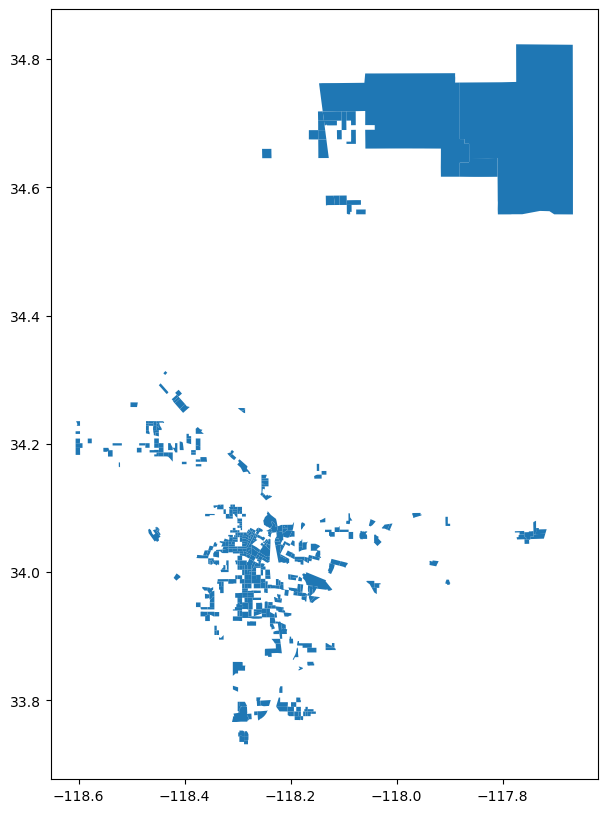

In [38]:
ct_IncRace[ct_IncRace.below_60pct_med_income == 'Yes'].plot(figsize=(12,10))

## export this merged dataset as a .csv

In [39]:
ct_IncRace.to_csv('merged/ct_IncRace.csv')

# I will now merge in Los Angeles neighborhood data to provide more geographic context to these census tracts

## import neighborhood data from downloaded from LA GeoHub 

In [40]:
neighborhoods = pd.read_csv('raw/2020_Census_Blocks.csv',
                           dtype=
    {
        'State':str,
        'COUNTY':str,
        'CT20': str
    })

## assess the structure of this dataset

In [41]:
neighborhoods.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91626 entries, 0 to 91625
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          91626 non-null  int64  
 1   State             91626 non-null  object 
 2   COUNTY            91626 non-null  object 
 3   CT20              91626 non-null  object 
 4   BG20              91626 non-null  int64  
 5   CB20              91626 non-null  int64  
 6   CTCB20            91626 non-null  int64  
 7   FEAT_TYPE         91626 non-null  object 
 8   FIP20             91626 non-null  int64  
 9   BGFIP20           91626 non-null  int64  
 10  CITY              91626 non-null  object 
 11  COMM              42565 non-null  object 
 12  CITYCOMM          91626 non-null  object 
 13  ZCTA20            90970 non-null  float64
 14  HD22              91516 non-null  float64
 15  HD_NAME           91516 non-null  object 
 16  SPA22             91516 non-null  float6

## generate a 'tract' variable so that the this dataset can be merged with our other dataset

In [42]:
neighborhoods['tract'] = neighborhoods["State"] + neighborhoods["COUNTY"] + neighborhoods["CT20"]
neighborhoods

,OBJECTID,State,COUNTY,CT20,BG20,CB20,CTCB20,FEAT_TYPE,FIP20,BGFIP20,...,POP20,HOUSING20,FIP_CURRENT,BG20FIP_CURRENT,CITY_CURRENT,COMM_CURRENT,CITYCOMM_CURRENT,ShapeSTArea,ShapeSTLength,tract
0,1,06,037,109300,1093002,2015,1093002015,Land,44000,109300244000,...,80,21,44000,109300244000,Los Angeles,Granada Hills,Los Angeles - Granada Hills,1.927920e+05,1868.300238,06037109300
1,2,06,037,109300,1093001,1007,1093001007,Land,44000,109300144000,...,63,17,44000,109300144000,Los Angeles,Granada Hills,Los Angeles - Granada Hills,3.572047e+05,3699.075975,06037109300
2,3,06,037,111100,1111001,1005,1111001005,Land,44000,111100144000,...,56,25,44000,111100144000,Los Angeles,Granada Hills,Los Angeles - Granada Hills,2.554624e+05,2487.624427,06037111100
3,4,06,037,111202,1112023,3009,1112023009,Land,44000,111202344000,...,99,30,44000,111202344000,Los Angeles,Granada Hills,Los Angeles - Granada Hills,2.895897e+05,2568.771746,06037111202
4,5,06,037,113101,1131011,1011,1131011011,Land,44000,113101144000,...,242,81,44000,113101144000,Los Angeles,Chatsworth,Los Angeles - Chatsworth,1.207529e+06,5298.323152,06037113101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91621,91622,06,037,431800,4318003,3003,4318003003,Land,2462,431800302462,...,433,187,2462,431800302462,Arcadia,NaN,City of Arcadia,5.617247e+05,3989.200130,06037431800
91622,91623,06,037,463900,4639003,3012,4639003012,Land,56000,463900356000,...,0,0,56000,463900356000,Pasadena,NaN,City of Pasadena,2.588258e+05,2341.812790,06037463900
91623,91624,06,037,464102,4641023,3010,4641023010,Land,68224,464102368224,...,34,11,68224,464102368224,San Marino,NaN,City of San Marino,3.216536e+05,2299.917150,06037464102
91624,91625,06,037,302505,3025051,1015,3025051015,Land,30000,302505130000,...,0,0,30000,302505130000,Glendale,NaN,City of Glendale,2.467247e+05,2029.356586,06037302505


## merge neighborhood dataset with 'ct_IncRace' dataset

In [43]:
neighborhood_IncRace=neighborhoods.merge(ct_IncRace,on="tract")
neighborhood_IncRace

,OBJECTID,State,COUNTY,CT20,BG20,CB20,CTCB20,FEAT_TYPE,FIP20,BGFIP20,...,Shape__Length,geometry,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,1,06,037,109300,1093002,2015,1093002015,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
1,2,06,037,109300,1093001,1007,1093001007,Land,44000,109300144000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
2,7,06,037,109300,1093002,2006,1093002006,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
3,8,06,037,109300,1093002,2013,1093002013,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
4,28,06,037,109300,1093002,2003,1093002003,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91592,81650,06,037,221820,2218202,2001,2218202001,Land,44000,221820244000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
91593,82545,06,037,221820,2218201,1002,2218201002,Land,44000,221820144000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
91594,82579,06,037,221820,2218201,1000,2218201000,Land,44000,221820144000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
91595,82580,06,037,221820,2218201,1001,2218201001,Land,44000,221820144000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0


## assess the structure of this merged dataset

In [44]:
neighborhood_IncRace.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91597 entries, 0 to 91596
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype   
---  ------                                                      --------------  -----   
 0   OBJECTID                                                    91597 non-null  int64   
 1   State                                                       91597 non-null  object  
 2   COUNTY                                                      91597 non-null  object  
 3   CT20                                                        91597 non-null  object  
 4   BG20                                                        91597 non-null  int64   
 5   CB20                                                        91597 non-null  int64   
 6   CTCB20                                                      91597 non-null  int64   
 7   FEAT_TYPE                                                   91597 non-null  

## filter dataset to only include neighborhoods within Los Angeles proper

In [45]:
LAneighborhood_IncRace = neighborhood_IncRace[neighborhood_IncRace['CITY_CURRENT']=='Los Angeles']
LAneighborhood_IncRace

,OBJECTID,State,COUNTY,CT20,BG20,CB20,CTCB20,FEAT_TYPE,FIP20,BGFIP20,...,Shape__Length,geometry,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
0,1,06,037,109300,1093002,2015,1093002015,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
1,2,06,037,109300,1093001,1007,1093001007,Land,44000,109300144000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
2,7,06,037,109300,1093002,2006,1093002006,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
3,8,06,037,109300,1093002,2013,1093002013,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
4,28,06,037,109300,1093002,2003,1093002003,Land,44000,109300244000,...,17334.508575,"POLYGON ((-118.48711 34.27013, -118.48695 34.2...",3120.0,1575.0,1545.0,1440.0,847.0,103.0,8.0,462.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91592,81650,06,037,221820,2218202,2001,2218202001,Land,44000,221820244000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
91593,82545,06,037,221820,2218201,1002,2218201002,Land,44000,221820144000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
91594,82579,06,037,221820,2218201,1000,2218201000,Land,44000,221820144000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0
91595,82580,06,037,221820,2218201,1001,2218201001,Land,44000,221820144000,...,5840.162706,"POLYGON ((-118.28883 34.03277, -118.28743 34.0...",2797.0,499.0,2298.0,2205.0,848.0,292.0,3.0,1044.0


In [46]:
LAneighborhood_IncRace.to_csv('merged/LAneighborhood_IncRace.csv')

In [47]:
neighborhoods_collapsed = LAneighborhood_IncRace.groupby('COMM_CURRENT').mean('median_hh_income')
neighborhoods_collapsed

,OBJECTID,BG20,CB20,CTCB20,FIP20,BGFIP20,ZCTA20,HD22,SPA22,SUP21,...,Shape__Area,Shape__Length,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
COMM_CURRENT,,,,,,,,,,,,,,,,,,,,,
Adams-Normandie,66232.270833,2.221502e+06,1692.104167,2.221502e+09,44000.0,2.221502e+11,90013.645833,75.000000,6.0,2.000000,...,5.169613e+06,10509.732436,3795.000000,2473.500000,1321.500000,1202.500000,244.000000,715.500000,3.000000,212.000000
Alsace,48765.350000,2.198644e+06,1936.683333,2.198644e+09,44000.0,2.198645e+11,90023.200000,75.000000,6.0,2.000000,...,6.157420e+06,10796.205265,3814.200000,2746.833333,1067.366667,970.500000,272.233333,568.866667,5.100000,91.200000
Angeles National Forest,41451.047619,9.800261e+06,1010.000000,9.800261e+09,44000.0,9.800261e+11,91041.619048,19.000000,2.0,5.000000,...,1.496110e+08,101888.807192,11.000000,1.000000,10.000000,9.000000,8.000000,1.000000,0.000000,0.000000
Angelino Heights,57960.250000,1.976001e+06,1354.950000,1.976001e+09,44000.0,1.976002e+11,90020.400000,9.000000,4.0,1.000000,...,4.213783e+06,10380.064742,2431.000000,1127.000000,1304.000000,1219.000000,800.000000,58.000000,5.000000,344.000000
Arleta,39586.976077,1.193085e+06,1985.856459,1.193085e+09,44000.0,1.193085e+11,91331.679426,19.000000,2.0,3.000000,...,1.003711e+07,14113.805638,3892.622010,3068.478469,824.143541,786.784689,347.081340,33.272727,6.483254,382.937799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wholesale District,50713.949757,2.114675e+06,1292.662885,2.114675e+09,44000.0,2.114675e+11,90021.985413,13.372771,4.0,1.000000,...,2.086484e+07,20407.155612,3056.729335,1439.294976,1617.434360,1529.440843,664.395462,418.889789,15.823339,402.247974
Wilmington,50963.514731,4.085919e+06,1601.369151,4.085919e+09,44000.0,4.085920e+11,90745.253472,31.000000,8.0,4.000000,...,2.221001e+07,22862.981519,3104.448873,2756.313692,348.135182,311.452340,128.190641,87.363951,6.140381,60.055459
Wilshire Center,49743.544776,2.114357e+06,1420.388060,2.114357e+09,44000.0,2.114358e+11,90008.380597,20.940299,4.0,1.992537,...,2.759417e+06,6854.234238,3218.328358,1463.283582,1755.044776,1677.656716,353.537313,158.305970,3.850746,1140.044776


In [48]:
neighborhoods_collapsed.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, Adams-Normandie to Woodland Hills
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   OBJECTID                                                    139 non-null    float64
 1   BG20                                                        139 non-null    float64
 2   CB20                                                        139 non-null    float64
 3   CTCB20                                                      139 non-null    float64
 4   FIP20                                                       139 non-null    float64
 5   BGFIP20                                                     139 non-null    float64
 6   ZCTA20                                                      139 non-null    float64
 7   HD22                                                        139 non-n

In [49]:
neighborhoods_collapsed.to_csv('merged/neighborhoods_collapsed.csv')

## sort neighborhoods/census tracts by median household income in descending order

In [52]:
neighborhoods_collapsed = neighborhoods_collapsed.sort_values(by='med_hh_income', ascending = False)
neighborhoods_collapsed

,OBJECTID,BG20,CB20,CTCB20,FIP20,BGFIP20,ZCTA20,HD22,SPA22,SUP21,...,Shape__Area,Shape__Length,Total Population,Total Hispanic/Latine Population,Total Non-Hispanic/Latine Population,"Total Non-Hispanic/Latine Population, One Race","Total White, Non-Hispanic/Latine","Total Black, Non-Hispanic/Latine","Total American Indian/American Native, Non-Hispanic/Latine","Total Asian, Non-Hispanic/Latine"
COMM_CURRENT,,,,,,,,,,,,,,,,,,,,,
Mandeville Canyon,34689.333333,2.624001e+06,1402.060606,2.624001e+09,44000.0,2.624002e+11,90163.878788,84.000000,5.00000,3.000000,...,1.211436e+08,72274.410067,3242.000000,215.000000,3027.000000,2879.000000,2620.000000,43.000000,4.000000,194.000000
Palisades Highlands,44116.347826,6.213101e+06,1312.608696,6.213101e+09,44000.0,6.213102e+11,90273.173913,84.000000,5.00000,3.000000,...,2.578016e+08,91910.005460,1955.500000,122.000000,1833.500000,1725.000000,1513.000000,16.000000,0.000000,185.000000
Bel Air,39960.500000,2.621518e+06,1877.935484,2.621518e+09,44000.0,2.621518e+11,90073.500000,84.000000,5.00000,3.000000,...,9.338476e+07,58382.179686,3895.903226,231.387097,3664.516129,3441.838710,2948.548387,76.000000,0.483871,378.419355
Beverly Crest,43450.232558,2.611392e+06,1379.511628,2.611392e+09,44000.0,2.611392e+11,90148.453488,84.000000,5.00000,3.000000,...,6.611648e+07,46446.602437,3304.162791,220.058140,3084.104651,2901.848837,2557.395349,57.232558,3.651163,257.569767
Pacific Palisades,48466.101167,2.626649e+06,2121.669261,2.626649e+09,44000.0,2.626650e+11,90281.098814,84.000000,5.00000,3.000000,...,3.191898e+07,30571.906725,4211.735409,251.754864,3959.980545,3731.027237,3422.066148,29.883268,4.241245,240.603113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chinatown,42268.171875,2.071022e+06,1385.312500,2.071022e+09,44000.0,2.071022e+11,90012.000000,9.000000,4.00000,1.000000,...,3.896386e+06,9307.620873,2984.562500,702.125000,2282.437500,2220.625000,325.343750,227.000000,8.250000,1641.312500
Pico-Union,47904.449438,2.164660e+06,1627.314607,2.164660e+09,44000.0,2.164661e+11,90010.095506,9.000000,4.00000,1.134831,...,3.719236e+06,8075.681559,3182.769663,2372.859551,809.910112,768.516854,175.983146,173.567416,5.264045,392.893258
University Park,55977.089744,2.239136e+06,1565.301282,2.239136e+09,44000.0,2.239136e+11,90009.589744,65.826923,5.74359,2.000000,...,6.150725e+06,10530.295048,3266.916667,1685.032051,1581.884615,1510.891026,593.839744,298.730769,7.647436,581.256410


## export dataset

In [53]:
neighborhoods_collapsed.to_csv('merged/neighborhoods_collapsed.csv')